In [61]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [62]:
data_dir="myData"
category=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

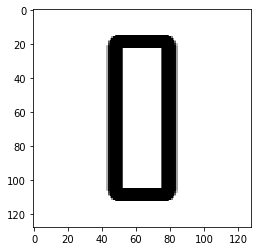

In [63]:
for cat in category:
    path=os.path.join(data_dir, cat)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show
        break
    break

<function matplotlib.pyplot.show(*args, **kw)>

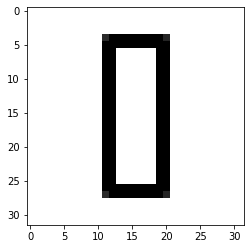

In [84]:
img_sz=32
new_array=cv2.resize(img_array, (img_sz, img_sz))
plt.imshow(new_array, cmap="gray")
plt.show

In [85]:
data=[]
label=[]
def create_data():
    for cat in category:
        path=os.path.join(data_dir, cat)
        class_num=category.index(cat)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path, img))
                new_array=cv2.resize(img_array, (img_sz, img_sz))
                data.append(new_array)
                label.append(class_num)
            except Exception as e:
                pass

create_data()

In [86]:
print(len(data))
print(len(label))

10160
10160


In [87]:
data=np.array(data)
label=np.array(label)
print(data.shape)

(10160, 32, 32, 3)


In [88]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(data, label, test_size=0.2)
X_train, X_validation, y_train, y_validation=train_test_split(X_train, y_train, test_size=0.2)



In [89]:
print(X_train.shape, X_validation.shape, X_test.shape)

(6502, 32, 32, 3) (1626, 32, 32, 3) (2032, 32, 32, 3)


In [90]:
samples=[]
for x in range(0, 10):
    samples.append(len(np.where(y_train==x)[0]))
print(samples)

[627, 641, 659, 654, 672, 668, 644, 655, 646, 636]


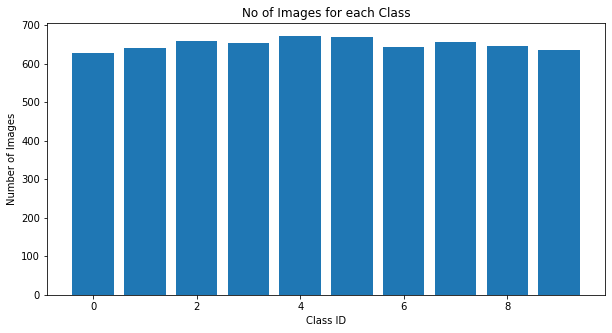

In [91]:
plt.figure(figsize=(10,5))
plt.bar(range(0,10),samples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

In [92]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

In [93]:
X_train= np.array(list(map(preProcessing,X_train)))
X_test= np.array(list(map(preProcessing,X_test)))
X_validation= np.array(list(map(preProcessing,X_validation)))


In [94]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

In [95]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(X_train)

In [96]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)
y_validation=to_categorical(y_validation, 10)

In [97]:
import tensorflow as tf
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(60, (5, 5), input_shape=(32,32,1)))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Conv2D(60, (5,5)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(30, (3, 3)))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Conv2D(30, (3, 3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,metrics=["accuracy"])

In [98]:
history=model.fit_generator(datagen.flow(X_train,y_train,
                                 batch_size=50),
                                 epochs=10,
                                 validation_data=(X_validation,y_validation))

Epoch 1/10
131/131 [==============================] - 144s 1s/step - loss: 1.3493 - accuracy: 0.5312 - val_loss: 0.1492 - val_accuracy: 0.9625
Epoch 2/10
131/131 [==============================] - 154s 1s/step - loss: 0.4429 - accuracy: 0.8576 - val_loss: 0.0747 - val_accuracy: 0.9815
Epoch 3/10
131/131 [==============================] - 145s 1s/step - loss: 0.2906 - accuracy: 0.9051 - val_loss: 0.0464 - val_accuracy: 0.9871
Epoch 4/10
131/131 [==============================] - 144s 1s/step - loss: 0.2285 - accuracy: 0.9265 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 5/10
131/131 [==============================] - 126s 962ms/step - loss: 0.1883 - accuracy: 0.9417 - val_loss: 0.0275 - val_accuracy: 0.9938
Epoch 6/10
131/131 [==============================] - 127s 972ms/step - loss: 0.1608 - accuracy: 0.9500 - val_loss: 0.0183 - val_accuracy: 0.9951
Epoch 7/10
131/131 [==============================] - 126s 961ms/step - loss: 0.1444 - accuracy: 0.9523 - val_loss: 0.0310 - val_accurac

In [99]:
test_loss, test_acc=model.evaluate(x=X_test, y=y_test)

64/64 [==============================] - 10s 155ms/step - loss: 0.0323 - accuracy: 0.9872


In [100]:
model.save('final_model.h5', history)

In [101]:
model=tf.keras.models.load_model('final_model.h5')

In [104]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img("two.png", grayscale=True, target_size=(32, 32))
img=img_to_array(img)
img=img.reshape(1, 32, 32, 1)
img=img.astype('float32')/255.0
#img=np.expand_dims(img, axis=0)
print(model.predict_classes(img))

[2]
